### Intro

This dataset contains marketing campaigns that are characterized by focusing on the customer needs and their overall satisfaction. Nevertheless, there are different variables that determine whether a marketing campaign will be successful or not. There are certain variables that we need to take into consideration when making a marketing campaign.

For more details, please refer to <a href='https://www.kaggle.com/janiobachmann/bank-marketing-dataset'>here</a>

### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load dataframe

In [2]:
df = pd.read_csv('C:/Users/jabchoi/Documents/data_set/bank.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [3]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [4]:
df.info()

# Attributes description
#1 - age: (numeric)
#2 - job: type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
#3 - marital: marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
#4 - education: (categorical: primary, secondary, tertiary and unknown)
#5 - default: has credit in default? (categorical: 'no','yes','unknown')
#6 - housing: has housing loan? (categorical: 'no','yes','unknown')
#7 - loan: has personal loan? (categorical: 'no','yes','unknown')
#8 - balance: Balance of the individual
#9 - contact: contact communication type (categorical: 'cellular','telephone')
#10 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
#11 - day: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
#12 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target
#13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
#14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
#15 - previous: number of contacts performed before this campaign and for this client (numeric)
#16 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
#17 - deposit - has the client subscribed a term deposit? (binary: 'yes','no')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
age          11162 non-null int64
job          11162 non-null object
marital      11162 non-null object
education    11162 non-null object
default      11162 non-null object
balance      11162 non-null int64
housing      11162 non-null object
loan         11162 non-null object
contact      11162 non-null object
day          11162 non-null int64
month        11162 non-null object
duration     11162 non-null int64
campaign     11162 non-null int64
pdays        11162 non-null int64
previous     11162 non-null int64
poutcome     11162 non-null object
deposit      11162 non-null object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


### Some plots

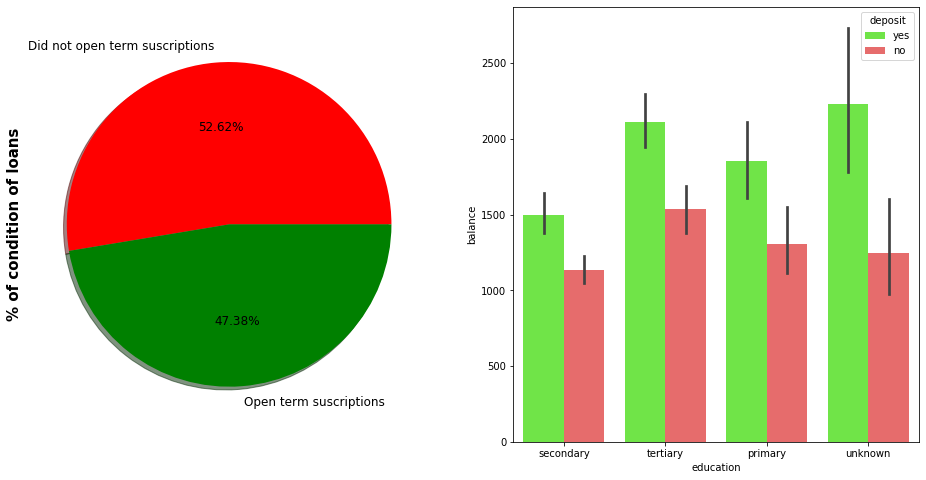

In [5]:
f, ax = plt.subplots(1,2, figsize=(16,8))

# Pie chart for deposit
labels="Did not open term suscriptions", "Open term suscriptions"
colors=["red", "green"]
df['deposit'].value_counts().plot.pie(autopct='%1.2f%%', ax=ax[0], shadow=True, colors=colors, labels=labels, fontsize=12)

ax[0].set_ylabel('% of condition of loans', fontsize=15, fontweight='bold')


# Bar plot - x-axis: education, y-axis: balance, category: deposit
sns.barplot(x='education', y='balance', hue='deposit', data=df, palette=["#64FE2E", "#FA5858"])
plt.show()

### Distribution of the numeric data

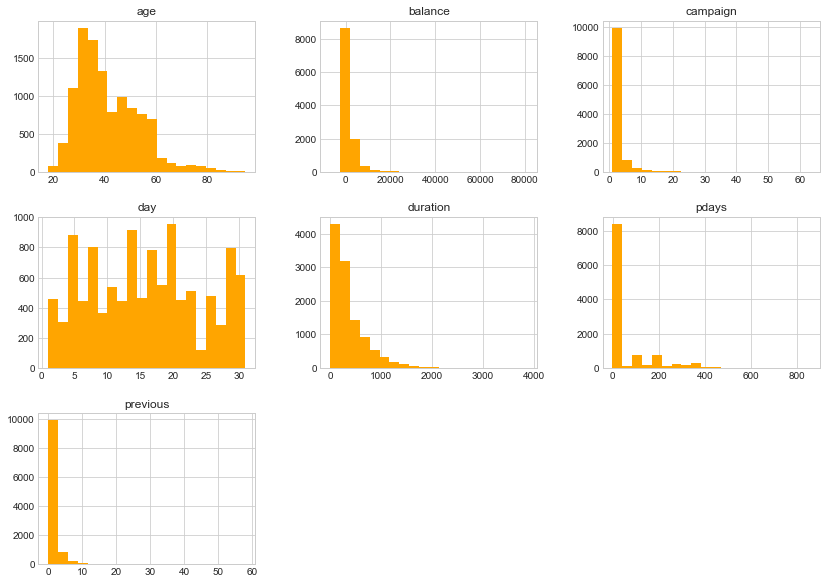

In [6]:
plt.style.use('seaborn-whitegrid')

# Histogram
df.hist(bins=20, figsize=(14,10), color='orange')
plt.show()

### Box iplot - which occupation tended to have more balance

In [7]:
# Drop meaningless data
df = df.drop(df.loc[df['job'] == 'unknown'].index)
df = df.drop(df.loc[df['balance'] == 0].index)

# admin is involved in 'management'
admin = [df]
for col in admin:
    col.loc[col['job'] == 'admin.', 'job'] = 'management'
    
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,management,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,management,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,management,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [8]:
deposited_df = df.loc[df['deposit'] == 'yes']

occupations = df['job'].unique().tolist()
occupations

['management',
 'technician',
 'services',
 'retired',
 'blue-collar',
 'unemployed',
 'entrepreneur',
 'housemaid',
 'self-employed',
 'student']

In [9]:
# Get the balance by jobs
# Values for distribution of ages by occupation
technician = deposited_df['age'].loc[deposited_df['job'] == 'technician'].values
services = deposited_df['age'].loc[deposited_df['job'] == 'services'].values
management = deposited_df['age'].loc[deposited_df['job'] == 'management'].values
retired = deposited_df['age'].loc[deposited_df['job'] == 'retired'].values
blue_collar = deposited_df['age'].loc[deposited_df['job'] == 'blue-collar'].values
unemployed = deposited_df['age'].loc[deposited_df['job'] == 'unemployed'].values
entrepreneur = deposited_df['age'].loc[deposited_df['job'] == 'entrepreneur'].values
housemaid = deposited_df['age'].loc[deposited_df['job'] == 'housemaid'].values
self_employed = deposited_df['age'].loc[deposited_df['job'] == 'self_employed'].values
student = deposited_df['age'].loc[deposited_df['job'] == 'student'].values

In [10]:
# import libraries for iplot
from plotly import tools
import chart_studio.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

ages = [technician, services, management, retired, blue_collar, unemployed, entrepreneur, housemaid, self_employed, student]
colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)',
          'rgba(44, 160, 101, 0.5)', 'rgba(255, 65, 54, 0.5)', 
          'rgba(207, 114, 255, 0.5)', 'rgba(127, 96, 0, 0.5)',
         'rgba(229, 126, 56, 0.5)', 'rgba(229, 56, 56, 0.5)',
         'rgba(174, 229, 56, 0.5)', 'rgba(229, 56, 56, 0.5)']

traces = []

for xd, yd, cls in zip(occupations, ages, colors):
    traces.append(go.Box(y=yd, name=xd, boxpoints='all', jitter=0.5, whiskerwidth=0.2, fillcolor=cls, marker=dict(size=2), line=dict(width=1)))

layout = go.Layout(
    title='Distribution of ages by occupation',
    yaxis=dict(autorange=True, showgrid=True, zeroline=True, dtick=5, gridcolor='rgb(255,255,255)', gridwidth=1, zerolinecolor='rgb(255,255,255)', zerolinewidth=2),
    margin=dict(l=40, r=30, b=80, t=100),
    paper_bgcolor='rgb(224,255,246)',
    plot_bgcolor='rgb(251,251,251)',
    showlegend=False
)

fig = go.Figure(data=traces, layout=layout)
iplot(fig)

### Balance Distribution
### Use box polar

In [11]:
# Create a Balance Category - Negative, Low, Middle and High balanace
df['balance_status'] = np.nan
df_list = [df]

for col in df_list:
    col.loc[col['balance'] < 0, 'balance_status'] = 'negative'
    col.loc[(col['balance'] >= 0) & (col['balance'] <=30000), 'balance_status'] = 'low'
    col.loc[(col['balance'] > 30000) & (col['balance'] <= 40000), 'balance_status'] = 'middle'
    col.loc[col['balance'] > 40000, 'balance_status'] = 'high'
    
negative = df['balance'].loc[df['balance_status'] == 'negative'].values.tolist()
low = df['balance'].loc[df['balance_status'] == 'low'].values.tolist()
middle = df['balance'].loc[df['balance_status'] == 'middle'].values.tolist()
high = df['balance'].loc[df['balance_status'] == 'high'].values.tolist()


# Average by occupation in each balance category
average_balance = df.groupby(['job', 'balance_status'])['balance'].mean()
average_balance

job            balance_status
blue-collar    high              66653.000000
               low                1435.980876
               negative           -255.663507
entrepreneur   high              51439.000000
               low                1666.805861
               middle            36935.000000
               negative           -422.777778
housemaid      low                1577.479167
               negative           -474.111111
management     high              56831.000000
               low                1796.649030
               middle            33984.666667
               negative           -369.484848
retired        high              81204.000000
               low                2344.495751
               middle            34906.000000
               negative           -296.217391
self-employed  high              52587.000000
               low                1854.191549
               negative           -440.888889
services       low                1306.381562
    

In [12]:
# Box Polar

# Negative balance
negative_trace = go.Barpolar(
    r=[-199.0, -392.0, -209.0, -247.0, -233.0, -270.0, -271.0, 0, -276.0, -134.5],
    text=["blue-collar", "entrepreneur", "housemaid", "management", "retired", "self-employed", "services", "student", "technician", "unemployed"],
    name='Negative Balance',
    marker=dict(color='rgb(246, 46, 46)')
)

# Low balance
low_trace = go.Barpolar(
    r=[319.5, 283.0, 212.0, 313.0, 409.0, 274.5, 308.5, 253.0, 316.0, 330.0],
    text=["blue-collar", "entrepreneur", "housemaid", "management", "retired", "self-employed", "services", "student", "technician", "unemployed"],
    name='Low Balance',
    marker=dict(color='rgb(246, 97, 46)')
)

# Middle balance
middle_trace = go.Barpolar(
    r=[2128.5, 2686.0, 2290.0, 2366.0, 2579.0, 2293.5, 2005.5, 2488.0, 2362.0, 1976.0],
    text=["blue-collar", "entrepreneur", "housemaid", "management", "retired", "self-employed", "services", "student", "technician", "unemployed"],
    name='Middle Balance',
    marker=dict(color='rgb(246, 179, 46)')
)

# High balance
high_trace = go.Barpolar(
    r=[14247.5, 20138.5, 12278.5, 12956.0, 20723.0, 12159.0, 12223.0, 13107.0, 12063.0, 15107.5],
    text=["blue-collar", "entrepreneur", "housemaid", "management", "retired", "self-employed", "services", "student", "technician", "unemployed"],
    name='High Balance',
    marker=dict(color='rgb(46, 246, 78)')
)



data_arr = [negative_trace, low_trace, middle_trace, high_trace]
layout = go.Layout(
    title='<b>Mean Balance in Account<br> <i> by Job Occupation</i></b>',
    font=dict(size=11),
    legend=dict(
        font=dict(size=15)
    ),
    radialaxis=dict(ticksuffix='%'),
    orientation=270
)


fig = go.Figure(data=data_arr, layout=layout)
fig.update_layout(title={'y':0.95, 'x':0.5, 'xanchor':'center', 'yanchor': 'top'}, legend=dict(x=0, y=1))
iplot(fig)

### Marital status

In [13]:
df['marital'].value_counts()

married     5815
single      3336
divorced    1174
Name: marital, dtype: int64

In [14]:
x_labels = ['married', 'single', 'divorced']
y_values = df['marital'].value_counts().tolist()

data = [go.Bar(x=x_labels, y=y_values, marker=dict(color='orange'))]
layout = go.Layout(title='<b>Count by Marital Status</b>')

fig = go.Figure(data=data, layout=layout)
fig.update_layout(title={'y':0.9, 'x':0.5, 'xanchor':'center', 'yanchor': 'top'})

iplot(fig)

### Distribution of balance by marital status

In [15]:
# Values for each marital status
single = df['balance'].loc[df['marital'] == 'single'].values
married = df['balance'].loc[df['marital'] == 'married'].values
divorced = df['balance'].loc[df['marital'] == 'divorced'].values

# Histogram for distribution of balance
single_dist = go.Histogram(x=single, histnorm='density', name='single', marker=dict(color='grey'))
married_dist = go.Histogram(x=married, histnorm='density', name='married', marker=dict(color='red'))
divorced_dist = go.Histogram(x=divorced, histnorm='density', name='disvorced', marker=dict(color='blue'))

# Subplots having 3 rows
fig = tools.make_subplots(rows=3)

fig.append_trace(single_dist, 1, 1)
fig.append_trace(married_dist, 2, 1)
fig.append_trace(divorced_dist, 3, 1)

fig['layout'].update(showlegend=True, height=1000, width=800, title='<b>Balance Distribution by Marital Status</b>')
fig.update_layout(title={'y':0.97, 'x':0.5, 'xanchor':'center', 'yanchor': 'top'})

iplot(fig)

C:\Users\jabchoi\AppData\Local\Continuum\anaconda3\envs\Python36\lib\site-packages\plotly\tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



Result: An amount of balance is high as Married > Single > Divorced

### How low is an amount of balance that divorced people have

In [16]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,balance_status
0,59,management,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes,low
1,56,management,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes,low
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes,low
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes,low
4,54,management,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes,low


In [17]:
fig = ff.create_facet_grid(df, x='duration', y='balance', color_name='marital', show_boxes=False,
                           marker={'size': 10, 'opacity': 1}, 
                           colormap={'single': 'rgb(165, 242, 242)', 'married': 'rgb(253, 174, 216)', 'divorced': 'rgba(201, 109, 59, 0.82)'})

fig['layout'].update(height=800, width=800, title='<b>Balance Distribution by Marital Status</b><br>Scatter plot')
fig.update_layout(title={'y':0.97, 'x':0.5, 'xanchor':'center', 'yanchor': 'top'})

iplot(fig)